<a href="https://colab.research.google.com/github/JHWannabe/TIL/blob/main/20230127/%5BDACON%5D_%EB%94%B0%EB%A6%89%EC%9D%B4_%EB%8C%80%EC%97%AC%EB%9F%89_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data  
서울시 마포구의 날짜별, 시간별 기상상황과 따릉이 대여 수 데이터

* id 고유 id
* hour 시간
* temperature 기온
* precipitation 비가 오지 않았으면 0, 비가 오면 1
* windspeed 풍속(평균)
* humidity 습도
* visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone 오존
* pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count 시간에 따른 따릉이 대여 수

## 1. 라이브러리 및 데이터

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train = pd.read_csv('/content/drive/MyDrive/bicycle/train.csv')

## 2. 탐색적 자료분석

In [3]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1,1.5,89,576,0.027,76.0,33.0,49
1,6,13,20.1,0,1.4,48,916,0.042,73.0,40.0,159
2,7,6,13.9,0,0.7,79,1382,0.033,32.0,19.0,26
3,8,23,8.1,0,2.7,54,946,0.040,75.0,64.0,57
4,9,18,29.5,0,4.8,7,2000,0.057,27.0,11.0,431


In [4]:
train.shape

(1459, 11)

In [5]:
train.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1459 non-null   float64
 3   hour_bef_precipitation  1459 non-null   int64  
 4   hour_bef_windspeed      1452 non-null   float64
 5   hour_bef_humidity       1459 non-null   int64  
 6   hour_bef_visibility     1459 non-null   int64  
 7   hour_bef_ozone          1385 non-null   float64
 8   hour_bef_pm10           1371 non-null   float64
 9   hour_bef_pm2.5          1344 non-null   float64
 10  count                   1459 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 125.5 KB


In [6]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          7
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone             74
hour_bef_pm10              88
hour_bef_pm2.5            115
count                       0
dtype: int64

In [7]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1459.000000,1459.000000,1452.000000,1459.000000,1459.000000,1385.000000,1371.000000,1344.000000,1459.000000
mean,1105.914325,11.493489,16.717478,0.032214,2.479408,52.238520,1404.838245,0.039165,57.177243,30.346726,108.563400
std,631.338681,6.922790,5.236475,0.176628,1.377453,20.359239,583.134536,0.019501,31.755245,14.712090,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.026000,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.050000,0.000000,3.400000,68.500000,1994.000000,0.052000,69.500000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [8]:
pm=['hour_bef_pm10','hour_bef_pm2.5']

#정렬 순서
pm_order=[
    'best',
    'good',
    'bad',
    'worst'
]
#미세먼지 수치에 매우 나쁨(worst), 나쁨(bad), 보통(good), 좋음(best)으로 바꿉니다
for pm_i in pm:
  train[pm_i] = train[pm_i].apply(lambda x : 'worst' if x >=76 else 'bad' if x>=36 else 'good' if x>=16 else 'best')

In [9]:
train['temp_grp']=0
temp_grp=['hour_bef_temperature']

#정렬 순서
temp_order=[
    '25~',
    '20~25',
    '15~20',
    '10~15',
    '5~10',
    '~5'
]
#온도 수치를 그룹화하여 5도 단위로 바꿉니다
for temp_i in temp_grp:
  train['temp_grp'] = train[temp_i].apply(lambda x : '25~' if x >=25 else '20~25' if x>=20 else '15~20' if x>=15 else '10~15' if x>=10 else '5~10' if x>=5 else '~5')

In [10]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,temp_grp
0,3,20,16.3,1,1.5,89,576,0.027,worst,good,49,15~20
1,6,13,20.1,0,1.4,48,916,0.042,bad,bad,159,20~25
2,7,6,13.9,0,0.7,79,1382,0.033,good,good,26,10~15
3,8,23,8.1,0,2.7,54,946,0.040,bad,bad,57,5~10
4,9,18,29.5,0,4.8,7,2000,0.057,good,best,431,25~


## 3. 시각화

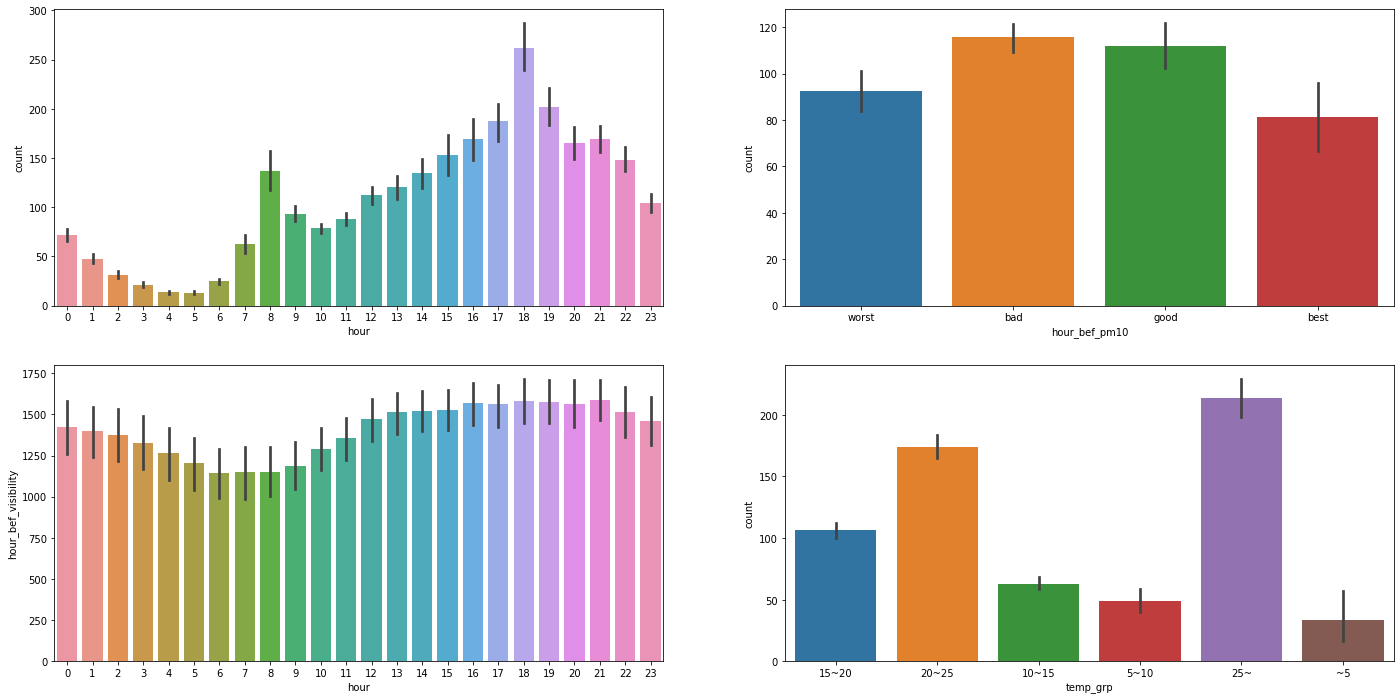

In [11]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(24,12)

sns.barplot(data=train, x="hour", y="count", ax=ax1)
sns.barplot(data=train, x="hour_bef_pm10", y="count", ax=ax2)
sns.barplot(data=train, x="hour", y="hour_bef_visibility", ax=ax3)
sns.barplot(data=train, x="temp_grp", y="count", ax=ax4)

### 3-1 Heatmap

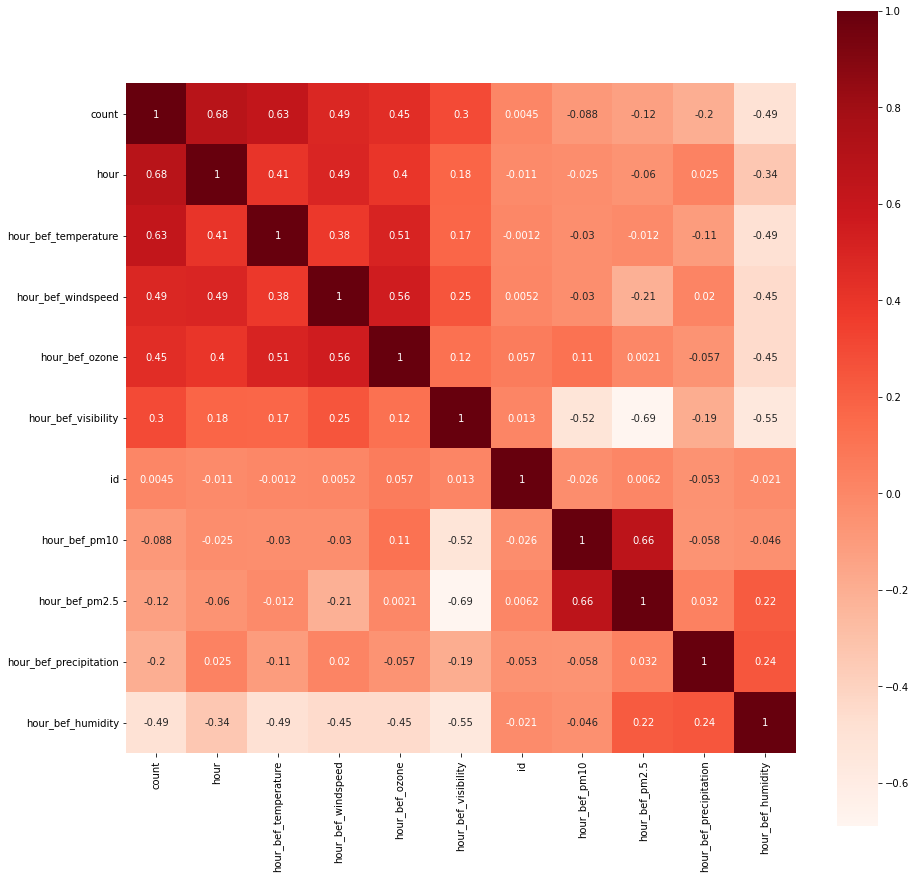

In [47]:
corrmat = train.corr(method='spearman')
indexes = corrmat.nlargest(n=11, columns='count').index
corrmat = train[indexes].corr(method='spearman')
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(corrmat,annot=True, square=True, cmap ='Reds')

### 3-2 Regplot

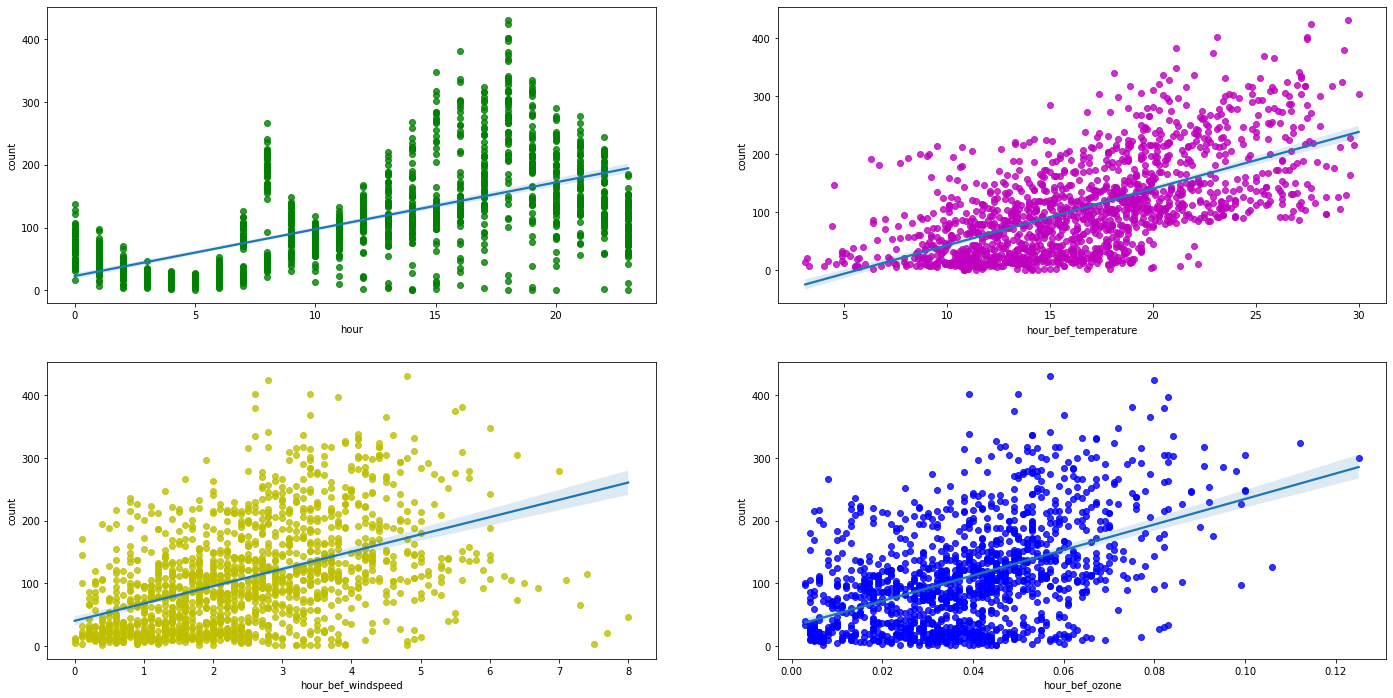

In [14]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(24,12)

sns.regplot(data=train, x='hour', y='count', scatter_kws={'color': 'g'}, ax=ax1)
sns.regplot(data=train, x='hour_bef_temperature', y='count', scatter_kws={'color':'m'}, ax=ax2)
sns.regplot(data=train, x='hour_bef_windspeed', y='count',scatter_kws={'color':'y'},ax=ax3)
sns.regplot(data=train, x='hour_bef_ozone', y='count',scatter_kws={'color':'b'},ax=ax4)

## 4. 변수 및 모델 정의

In [15]:
train = pd.read_csv('/content/drive/MyDrive/bicycle/train.csv')

In [16]:
X = train.drop(['count'], axis=1)
y = train['count']

In [17]:
X['hour_bef_windspeed']=X['hour_bef_windspeed'].fillna(X['hour_bef_windspeed'].mean())

In [18]:
X.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone             74
hour_bef_pm10              88
hour_bef_pm2.5            115
dtype: int64

In [19]:
X.fillna(0,inplace = True)

In [20]:
X.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,3,20,16.3,1,1.5,89,576,0.027,76.0,33.0
1,6,13,20.1,0,1.4,48,916,0.042,73.0,40.0
2,7,6,13.9,0,0.7,79,1382,0.033,32.0,19.0
3,8,23,8.1,0,2.7,54,946,0.040,75.0,64.0
4,9,18,29.5,0,4.8,7,2000,0.057,27.0,11.0


### 4-1 성능 확인

In [21]:
# 머신러닝
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import math
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
print('X_train shape:', X_train.shape)
print('X_valid shape:', X_val.shape)
print('y_train shape:', y_train.shape)
print('y_valid shape:', y_val.shape)

X_train shape: (1167, 10)
X_valid shape: (292, 10)
y_train shape: (1167,)
y_valid shape: (292,)


In [23]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat = linreg.predict(X_val)

mean_squared_error = metrics.mean_squared_error(y_hat, y_val)
linreg_rmse = math.sqrt(mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % linreg_rmse)

Root Mean Squared Error (on training data): 52.407


In [24]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_hat = logreg.predict(X_val)

mean_squared_error = metrics.mean_squared_error(y_hat, y_val)
logreg_rmse = math.sqrt(mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % logreg_rmse)

Root Mean Squared Error (on training data): 86.131


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
svc = SVC()
svc.fit(X_train, y_train)
y_hat = svc.predict(X_val)

mean_squared_error = metrics.mean_squared_error(y_hat, y_val)
svc_rmse = math.sqrt(mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % svc_rmse)

Root Mean Squared Error (on training data): 113.162


In [26]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_hat = knn.predict(X_val)

mean_squared_error = metrics.mean_squared_error(y_hat, y_val)
knn_rmse = math.sqrt(mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % knn_rmse)

Root Mean Squared Error (on training data): 103.262


In [27]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_hat = gaussian.predict(X_val)

mean_squared_error = metrics.mean_squared_error(y_hat, y_val)
gaussian_rmse = math.sqrt(mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % gaussian_rmse)

Root Mean Squared Error (on training data): 66.940


In [28]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_hat = perceptron.predict(X_val)

mean_squared_error = metrics.mean_squared_error(y_hat, y_val)
perceptrom_rmse = math.sqrt(mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % perceptrom_rmse)

Root Mean Squared Error (on training data): 125.434


In [29]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_hat = linear_svc.predict(X_val)

mean_squared_error = metrics.mean_squared_error(y_hat, y_val)
linsvc_rmse = math.sqrt(mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % linsvc_rmse)

Root Mean Squared Error (on training data): 187.350


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [30]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_hat = sgd.predict(X_val)

mean_squared_error = metrics.mean_squared_error(y_hat, y_val)
sgd_rmse = math.sqrt(mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % sgd_rmse)

Root Mean Squared Error (on training data): 236.361


In [31]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_hat = decision_tree.predict(X_val)

mean_squared_error = metrics.mean_squared_error(y_hat, y_val)
decision_tree_rmse = math.sqrt(mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % decision_tree_rmse)

Root Mean Squared Error (on training data): 57.563


In [32]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_hat = random_forest.predict(X_val)

mean_squared_error = metrics.mean_squared_error(y_hat, y_val)
random_forest_rmse = math.sqrt(mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % random_forest_rmse)

Root Mean Squared Error (on training data): 51.422


In [33]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Linear Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'RMSE_Score': [svc_rmse, knn_rmse, logreg_rmse, linreg_rmse,
              random_forest_rmse, gaussian_rmse, perceptrom_rmse, 
              sgd_rmse, linsvc_rmse, decision_tree_rmse]})
models.sort_values(by='RMSE_Score', ascending=True)

,Model,RMSE_Score
4,Random Forest,51.422172
3,Linear Regression,52.406940
9,Decision Tree,57.562533
5,Naive Bayes,66.940170
2,Logistic Regression,86.130595
1,KNN,103.262500
0,Support Vector Machines,113.162025
6,Perceptron,125.433836
8,Linear SVC,187.349922
7,Stochastic Gradient Decent,236.361301


## 5. 모델 test

In [34]:
test = pd.read_csv('/content/drive/MyDrive/bicycle/test.csv')

In [35]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [36]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [37]:
test[test['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
X[X['hour']==19]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
32,55,19,11.4,0,2.2,87,800,0.040,39.0,27.0
40,72,19,18.9,0,2.8,59,1806,0.042,49.0,26.0
95,142,19,25.0,0,3.7,24,2000,0.054,41.0,23.0
98,146,19,17.8,0,3.6,53,746,0.040,83.0,47.0
110,168,19,20.0,0,3.8,72,1406,0.022,37.0,22.0
...,...,...,...,...,...,...,...,...,...,...
1362,2048,19,23.3,0,3.5,40,1942,0.041,55.0,29.0
1370,2057,19,16.6,0,5.0,25,2000,0.048,54.0,18.0
1402,2101,19,12.7,0,3.5,34,1250,0.065,75.0,62.0
1426,2137,19,12.4,0,4.5,15,2000,0.044,63.0,15.0


In [39]:
test['hour_bef_temperature']=test['hour_bef_temperature'].fillna(20)
test['hour_bef_precipitation']=test['hour_bef_precipitation'].fillna(0)
test['hour_bef_windspeed']=test['hour_bef_windspeed'].fillna(3.8)
test['hour_bef_humidity']=test['hour_bef_humidity'].fillna(72)
test['hour_bef_visibility']=test['hour_bef_visibility'].fillna(1406)
test['hour_bef_ozone']=test['hour_bef_ozone'].fillna(0.022)
test['hour_bef_pm10']=test['hour_bef_pm10'].fillna(X['hour_bef_pm10'].mean())
test['hour_bef_pm2.5']=test['hour_bef_pm2.5'].fillna(test['hour_bef_pm2.5'].mean())

In [40]:
test.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [41]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)
Y_pred = model.predict(test)

In [44]:
Y_pred

array([ 30, 304,  37,  18,   1, 107, 217, 304,  13,  37, 278, 214, 113,
        30, 150,  97,  30,  38, 380, 122, 106,  26,  30, 121, 118, 121,
        30, 107,  92,  97,  46,  30,  94, 118, 278,  15, 114,   1, 304,
        86,   3, 121, 267,  37, 324, 221,   9,  94,  46,  80, 369,  94,
        57,  93, 118, 189,  52, 142,  13,  16, 106,  99, 247, 290, 138,
       252,   9, 304, 102,  30,  95,  20, 215,  30, 317, 284,  37, 119,
       317,  15, 252, 118, 103,  80,  95, 278,  94,  97,  94, 150, 113,
       153,  76,  92,  20,  80,  87,  19, 191, 138,  24, 140,   6,  95,
        15,   1,  92,  13, 180,  38, 164, 284, 199, 121, 107,  97, 150,
        20, 284,  17, 114,  74,   1, 102,  86, 129,  39,  27, 237,  46,
       118, 126,  46, 126, 215, 126,  40, 126, 310, 369,  75,  20,  37,
        40, 137,  87,  42, 107, 142, 227, 118, 278, 187, 176, 112,   3,
        79,   3,  80, 227, 304,  26, 247, 304, 118,  13,  92, 112, 324,
        30,  87, 113,  98, 141,  95,  74, 114, 221, 304, 110, 24

In [42]:
submission = pd.DataFrame({
        "id": test["id"],
        "count": Y_pred
    })

submission.to_csv('submission.csv', index=False)

In [43]:
submission

,id,count
0,0,30
1,1,304
2,2,37
3,4,18
4,5,1
...,...,...
710,2148,86
711,2149,53
712,2165,119
713,2166,118
